In [2]:
import os
import numpy as np
import random
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

In [45]:
lines = []
f = open('./data/shakespeare_proc.txt', 'r')
for line in f:
    lines.append(line)
f.close()

In [46]:
new_lines = []
for line in lines:
    new_lines.append(line[:-1])

In [47]:
n = len(new_lines)
rhymes = []
i = 0
while i < n:
    a = (new_lines[i].split()[-1], new_lines[i+2].split()[-1])
    b = (new_lines[i+1].split()[-1], new_lines[i+3].split()[-1])
    c = (new_lines[i+4].split()[-1], new_lines[i+6].split()[-1])
    d = (new_lines[i+5].split()[-1], new_lines[i+7].split()[-1])
    e = (new_lines[i+8].split()[-1], new_lines[i+10].split()[-1])
    f = (new_lines[i+9].split()[-1], new_lines[i+11].split()[-1])
    g = (new_lines[i+12].split()[-1], new_lines[i+13].split()[-1])
    rhymes += [a, b, c, d, e, f, g]
    i += 14

In [3]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare_poems.txt')).read()

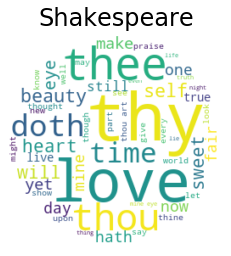

In [4]:
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [5]:
syl = {}
f = open('./data/Syllable_dictionary.txt', 'r')
for line in f:
    new_line = line[:-1]
    line_lst = list(new_line.split(" "))
    syl[line_lst[0]] = line_lst[1:]
f.close()

In [6]:
obs, obs_map = parse_observations(text)
emission_map = {v: k for k, v in obs_map.items()}

In [7]:
def get_obs(O, state):
    rand_var = random.uniform(0, 1)
    next_obs = 0

    while rand_var > 0:
        rand_var -= O[state][next_obs]
        next_obs += 1

    next_obs -= 1
    return next_obs

In [60]:
def normalize(A):
    n = len(A)
    for i in range(n):
        row = A[i]
        norm = np.linalg.norm(row)
        if norm != 0:
            A[i] = row / norm
    return A

In [79]:
def generate_line_rev(hmm, ending):
    A = normalize(np.transpose(hmm.A))
    O = hmm.O
    L = hmm.L
    state = np.random.choice(L)
    
    words = []
    words.append(ending)
    syllables = 0
    
    try:
        syls = syl[ending]
    except KeyError:
        word = ending.strip("'")
        syls = syl[word]
        
    if syls[0][0] == 'E':
        syllables += int(syls[0][1])
    else:
        syllables += int(syls[0])
        
    while syllables < 10:
        # Sample next observation.
        next_obs = get_obs(O, state)
        added = False
        
        # add the word to line
        word = emission_map[next_obs]
        try:
            syls = syl[word]
        except KeyError:
            word = word.strip("'")
            syls = syl[word]
        if syls[0][0] == 'E':
            n = int(syls[0][1])
            if n + syllables == 10:
                words.append(word)
                syllables += n
                added = True
            else:
                n = int(syls[1])
                if n + syllables <= 10:
                    words.append(word)
                    syllables += n
                    added = True
        else:
            n = int(syls[0])
            if n + syllables <= 10:
                words.append(word)
                syllables += n
                added = True
        
        # Sample next state if word added
        if added:
            rand_var = random.uniform(0, 1)
            next_state = 0

            while rand_var > 0:
                rand_var -= A[state][next_state]
                next_state += 1

            next_state -= 1
            state = next_state
        
    words.reverse()
    return ' '.join(words)

In [62]:
def generate_rhyming_lines(hmm):
    i = np.random.choice(len(rhymes))
    rhyme = rhymes[i]
    
    line1 = generate_line_rev(hmm, rhyme[0])
    line2 = generate_line_rev(hmm, rhyme[1])
    return line1, line2

In [64]:
def generate_stanza(hmm):
    line1, line3 = generate_rhyming_lines(hmm)
    line2, line4 = generate_rhyming_lines(hmm)
    return [line1, line2, line3, line4]

In [65]:
def generate_couplet(hmm):
    line1, line2 = generate_rhyming_lines(hmm)
    return [line1, line2]

In [76]:
def generate_sonnet(hmm):
    stanza1 = generate_stanza(hmm)
    stanza2 = generate_stanza(hmm)
    stanza3 = generate_stanza(hmm)
    couplet = generate_couplet(hmm)
    
    formatted_sonnet = []
    sonnet = stanza1 + stanza2 + stanza3 + couplet
    for i in range(14):
        line = sonnet[i]
        line = line.capitalize()
        if i == 13:
            line += '.'
        elif i % 4 == 3:
            line += ':'
        else:
            line += ','
        formatted_sonnet.append(line)
    
    return formatted_sonnet

In [63]:
generate_rhyming_lines(hmms[0])

("offenders worthy all is thou gild'st face",
 'with life is thou in by dear and disgrace')

In [ ]:
hmms = []

In [9]:
# train HMMs
# tried several number of states and found best to be 20 states
num_states = [10, 20, 30, 40]

for num in num_states:
    print("Training HMM with %d states for 100 iterations" % num)
    hmm = unsupervised_HMM(obs, num, 100)
    hmms.append(hmm)
    print("================================================")

Training HMM with 10 states for 100 iterations
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Training HMM with 20 states for 100 iterations
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Training HMM with 30 states for 100 iterations
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Training HMM with 40 states for 100 iterations
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [77]:
for i in range(len(hmms)):
    print("Sonnet with HMM %d\n" % (10 + 10 * i))
    print("===============================================")
    sonnet = generate_sonnet(hmms[i])
    for line in sonnet:
        print(line, end='\n')
    print("===============================================")

Sonnet with HMM 10

I why nights pursuit wooed do therefore fault,
No heart care sinks o long turns bare shall lies,
Deserves bastard proudest know their take halt,
Those thy being here and among subtleties:
A in to sun lie askance that in bent,
Soul and watch the carcanet my such time,
Face spring and wishing how is discontent,
Thee but water am for decree is prime:
Old every great through healthful state of youth,
I never eye when he correct sweet eyes,
I now of thine means being heart so ink truth,
Mine the active are heart is taken lies:
And all turned in the debate and deceive,
Sweet your those trust sweet all bell breath that leave.
Sonnet with HMM 20

Is me against woe prison eyes some eye,
Famine true that would with heaven's love it grief,
Within ill time you bones and remedy,
One a in be with boat thee travel thief:
Most of mine a of or nor to thy bed,
A every self and farther i be cover,
Let a out were his compare so well head,
Still dost it thy love love eyes forfeit lover:

In [85]:
# HMM with 40 hidden states seems the best.
sonnet = generate_sonnet(hmms[3])
for line in sonnet:
    print(line, end='\n')

Treads love grow seemed shall ye that can i chase,
Array you my death's part and error doubt,
Eternity several of new looks face,
And for a find a till mourning with out:
In some shouldst love but no behold of heart,
Eyes that last in read are huswife in slow,
Antique the mine let a scope restore art,
For woman's your yours chaste be glance his know:
Remove but not moan as the story make,
How and alike is love being when so praise,
Of correspondence countenance forsake,
Seal there hell of much perceive his thy days:
Yet all the content for truth see their write,
If with the world's for gilded men harsh quite.


In [17]:
# write poem to file
with open('./poems/rhyme_hmm.txt', 'w') as f:
    for line in sonnet:
        f.write("%s\n" % line)